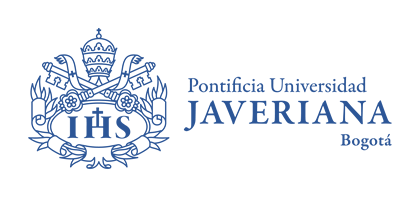

# Técnicas de aprendizaje de máquina - Taller 2

## Integrantes
- Andrés García Montoya
- Juan José Gomez Arenas

## **Importación de Biblioteca**
En primer lugar se realizara la importacion de bibliotecas necesarias.


In [116]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

## **Carga y Exploración de Datos**


In [117]:
df = pd.read_csv('./marketing_campaign.csv', sep='\t')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Al verificar en la fuente de datos es posible evidenciar que el set de datos corresponde a un analisis de personalidad de clientes, teniendo como objetivo analizar a los clientes para ayudar a las empresas a comprender mejor a su cliente ideal, permitiéndoles adaptar productos y esfuerzos de marketing a segmentos específicos.

**Categorías de Datos**

- *Personas:* Información demográfica y personal de los clientes, como edad, nivel educativo, estado civil e ingresos.

- *Productos:* Gasto en diferentes tipos de productos (vino, carne, frutas, etc.) en los últimos dos años.

- *Promociones:* Información sobre la respuesta de los clientes a las campañas promocionales y el uso de descuentos.

- *Lugar de Compra:* Datos sobre dónde compran los clientes (en línea, catálogo, tienda física) y cuántas veces visitan el sitio web.

In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## **Estandarización y preparación de Datos**
En este apartado se realizara la estandarización de los datos y la preparación de los mismos.

In [119]:
# En primer lugar se verifican los datos faltantes
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [120]:
# Se realizara una imputación de datos para los faltantes en Income utilizando KNN

from sklearn.impute import KNNImputer


imputer = KNNImputer(n_neighbors=5)

# Seleccionar solo las columnas numéricas que utilizarás para la imputación (excluyendo 'Income')
numeric_features = df.select_dtypes(include=['float64', 'int64'])

# Imputar los valores faltantes en 'Income'
imputed_df = numeric_features.copy()

# Imputar los valores
imputed_values = imputer.fit_transform(imputed_df)

# Asignar los valores imputados de nuevo a un DataFrame
imputed_df = pd.DataFrame(imputed_values, columns=numeric_features.columns)

# Reemplazar los valores NaN en la columna 'Income' del DataFrame original
df['Income'] = imputed_df['Income']

# Verificar si se han imputado los valores
print(df.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [121]:
# Para simplificar las variables y eliminar algunas innecesarias se realizaran algunas transformaciones

# 1. Se borrara la columna 'ID'
df = df.drop(columns=['ID'])

# 2. Se calculara la edad en lugar de la columna 'Year_Birth'
df['Age'] = 2021 - df['Year_Birth']  # Según el dataset original se considera el año 2021
df = df.drop(columns=['Year_Birth'])

# 3. Se calculara Enrollment como variable de lo que lleva el cliente a partir de 'Dt_Customer' (Años)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Enrollment'] = (pd.to_datetime('2021-01-01') - df['Dt_Customer']).dt.days // 365  # Ajusta la fecha si es necesario
df = df.drop(columns=['Dt_Customer'])

# 4. Se borran Z_CostContract y Z_Revenue ya que tienen todas las filas un solo valor para ambas
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

# 5. Sumar Kidhome y Teenhome y crear la columna Children
df['Children'] = df['Kidhome'] + df['Teenhome']
df = df.drop(columns=['Kidhome', 'Teenhome'])

# 6. Sumar NumDealsPurchases, NumWebPurchases, NumCatalogPurchases y NumStorePurchases y crear la columna Expenses
df['Expenses'] = (df['NumDealsPurchases'] + 
                  df['NumWebPurchases'] + 
                  df['NumCatalogPurchases'] + 
                  df['NumStorePurchases'])

df = df.drop(columns=['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])

# 7. Crear una nueva columna AcceptedOffers que sume todas las campañas aceptadas y la respuesta
df['AcceptedOffers'] = (df['AcceptedCmp1'] + 
                        df['AcceptedCmp2'] + 
                        df['AcceptedCmp3'] + 
                        df['AcceptedCmp4'] + 
                        df['AcceptedCmp5'] + 
                        df['Response'])

# Eliminar las columnas originales de aceptación
df = df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response'])

# Visualizar el DataFrame resultante
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Marital_Status     2240 non-null   object 
 2   Income             2240 non-null   float64
 3   Recency            2240 non-null   int64  
 4   MntWines           2240 non-null   int64  
 5   MntFruits          2240 non-null   int64  
 6   MntMeatProducts    2240 non-null   int64  
 7   MntFishProducts    2240 non-null   int64  
 8   MntSweetProducts   2240 non-null   int64  
 9   MntGoldProds       2240 non-null   int64  
 10  NumWebVisitsMonth  2240 non-null   int64  
 11  Complain           2240 non-null   int64  
 12  Age                2240 non-null   int64  
 13  Enrollment         2240 non-null   int64  
 14  Children           2240 non-null   int64  
 15  Expenses           2240 non-null   int64  
 16  AcceptedOffers     2240 

In [122]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,2240.0,52202.561429,25104.207286,1730.0,35233.50,51369.0,68468.25,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumWebVisitsMonth,2240.0,5.316518,2.426645,0.0,3.00,6.0,7.00,20.0
Complain,2240.0,0.009375,0.096391,0.0,0.00,0.0,0.00,1.0


### **Verificar valores atípicos**

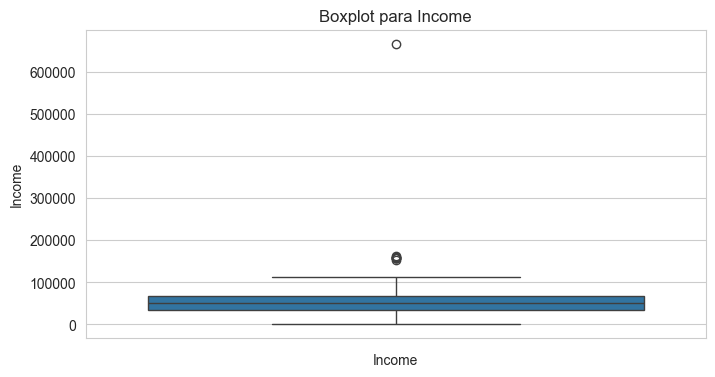

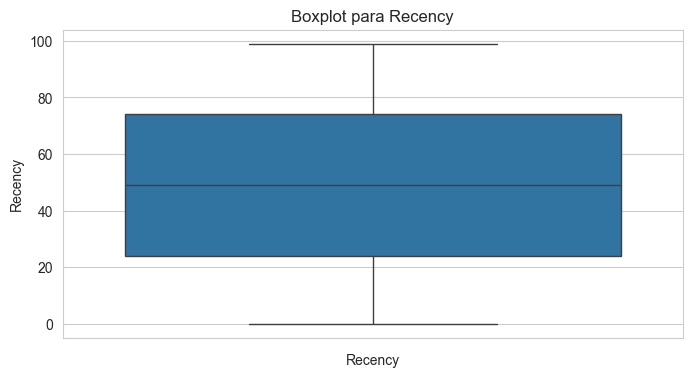

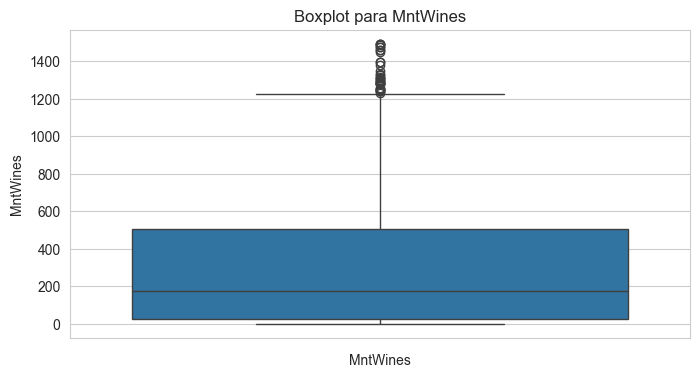

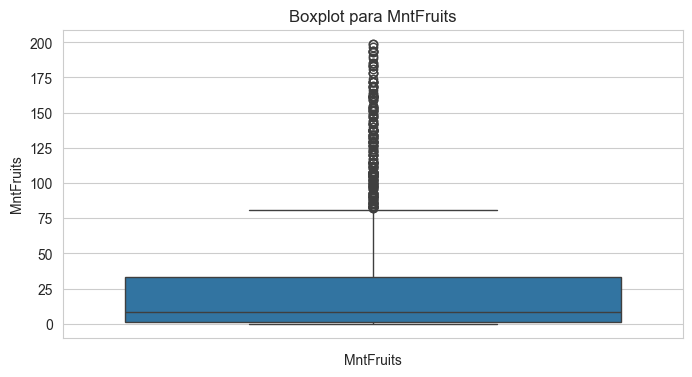

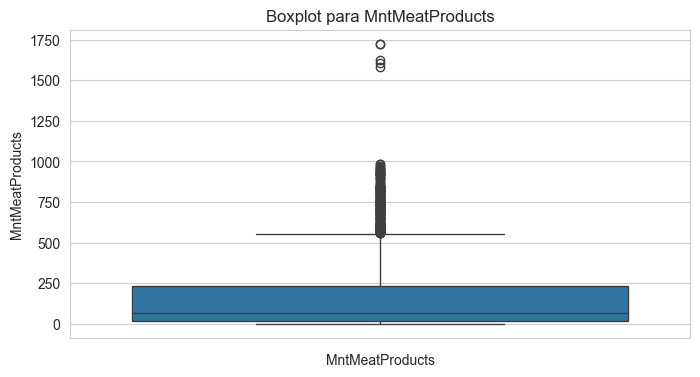

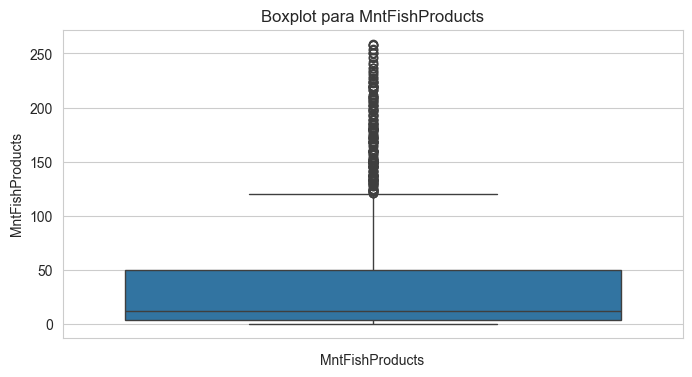

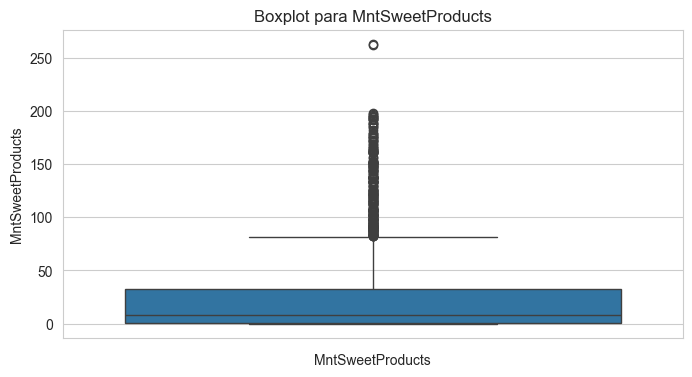

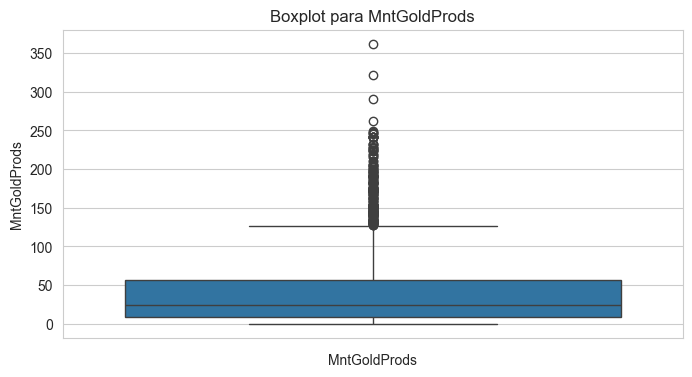

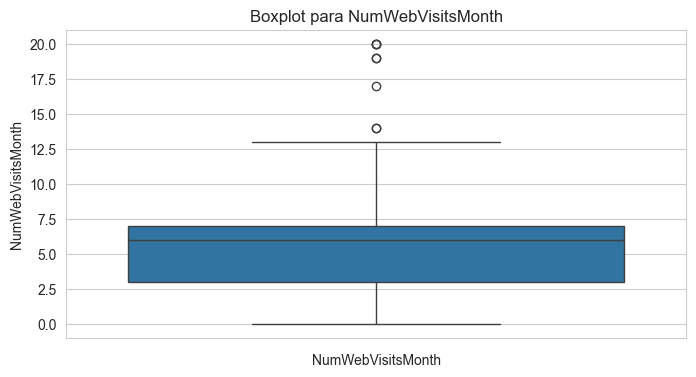

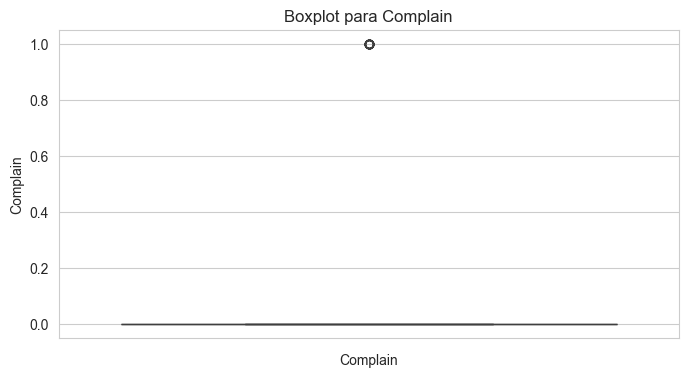

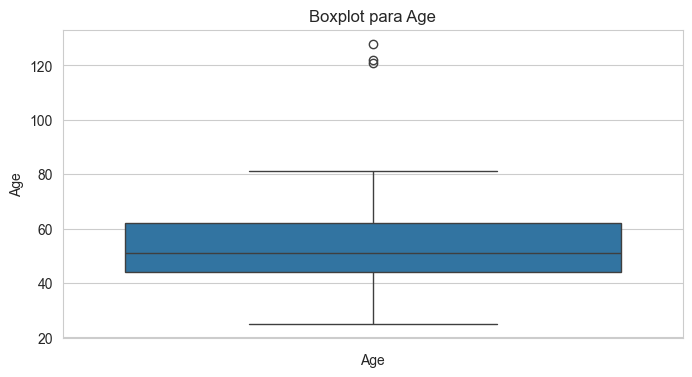

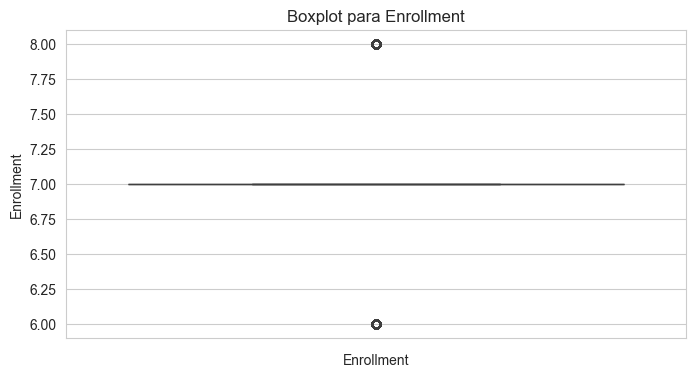

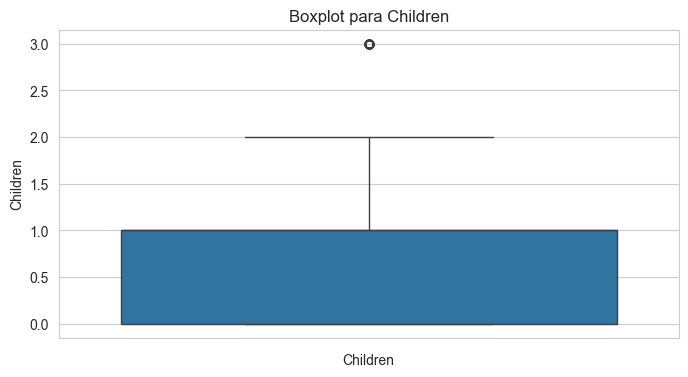

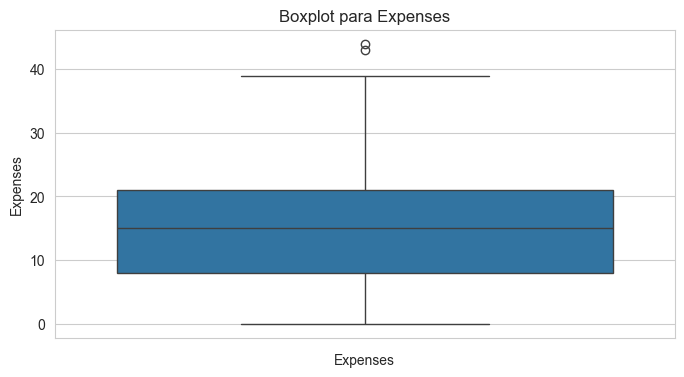

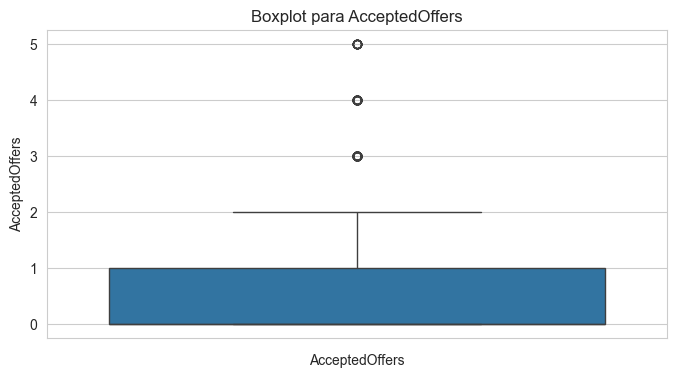

In [123]:
# Seleccionar solo columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Crear boxplot para cada columna numérica
for column in numeric_df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(y=numeric_df[column])
    plt.title(f'Boxplot para {column}')
    plt.xlabel(column)
    plt.show()


In [124]:
# Al verificar los datos atipicos, se opto por remover la fila que contiene al dato de income que supera los 600.000, pues su relacion con las otras es bastante distinta.

df = df[df['Income'] < 600000]

# Visualizar el DataFrame resultante

df.describe().T

# A pesar de que aun hay algunos datos fuera de rango, se opto por manntenerlos, pues si se removieran todas las filas con estos datos, se perderia 1/4 del dataset.

,count,mean,std,min,25%,50%,75%,max
Income,2239.0,51928.124877,21487.691790,1730.0,35221.0,51369.0,68429.5,162397.0
Recency,2239.0,49.121036,28.963662,0.0,24.0,49.0,74.0,99.0
MntWines,2239.0,304.067441,336.614830,0.0,24.0,174.0,504.5,1493.0
MntFruits,2239.0,26.307727,39.781468,0.0,1.0,8.0,33.0,199.0
MntMeatProducts,2239.0,167.016525,225.743829,0.0,16.0,67.0,232.0,1725.0
MntFishProducts,2239.0,37.538633,54.637617,0.0,3.0,12.0,50.0,259.0
MntSweetProducts,2239.0,27.074587,41.286043,0.0,1.0,8.0,33.0,263.0
MntGoldProds,2239.0,44.036177,52.174700,0.0,9.0,24.0,56.0,362.0
NumWebVisitsMonth,2239.0,5.316213,2.427144,0.0,3.0,6.0,7.0,20.0
Complain,2239.0,0.009379,0.096412,0.0,0.0,0.0,0.0,1.0


In [125]:
from sklearn.preprocessing import StandardScaler

# Finalmente se utiliza StandardScaler para alinear las escalas de todas las características para que contribuyan de manera equitativa al modelo.
scaler = StandardScaler()

# Seleccionar las columnas a escalar
columns_to_scale = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
columns_to_scale.remove('Complain')  # Excluir la columna booleana

# Ajustar y transformar los datos
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Mostrar la descripción del DataFrame
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Income,2239.0,6.188291e-17,1.000223,-2.336656,-0.777694,-0.026027,0.768117,5.142179
Recency,2239.0,3.411494e-17,1.000223,-1.696333,-0.867523,-0.004180,0.859163,1.722507
MntWines,2239.0,-4.125527e-17,1.000223,-0.903511,-0.832197,-0.386485,0.595569,3.532816
MntFruits,2239.0,-4.601550e-17,1.000223,-0.661454,-0.636311,-0.460310,0.168263,4.341993
MntMeatProducts,2239.0,2.221438e-17,1.000223,-0.740015,-0.669122,-0.443152,0.287928,6.903097
MntFishProducts,2239.0,3.332157e-17,1.000223,-0.687201,-0.632281,-0.467523,0.228124,4.054182
MntSweetProducts,2239.0,-5.712269e-17,1.000223,-0.655927,-0.631700,-0.462114,0.143553,5.715687
MntGoldProds,2239.0,-5.236246e-17,1.000223,-0.844203,-0.671667,-0.384107,0.229354,6.095576
NumWebVisitsMonth,2239.0,1.872355e-16,1.000223,-2.190805,-0.954509,0.281788,0.693887,6.051173
Complain,2239.0,9.379187e-03,0.096412,0.000000,0.000000,0.000000,0.000000,1.000000


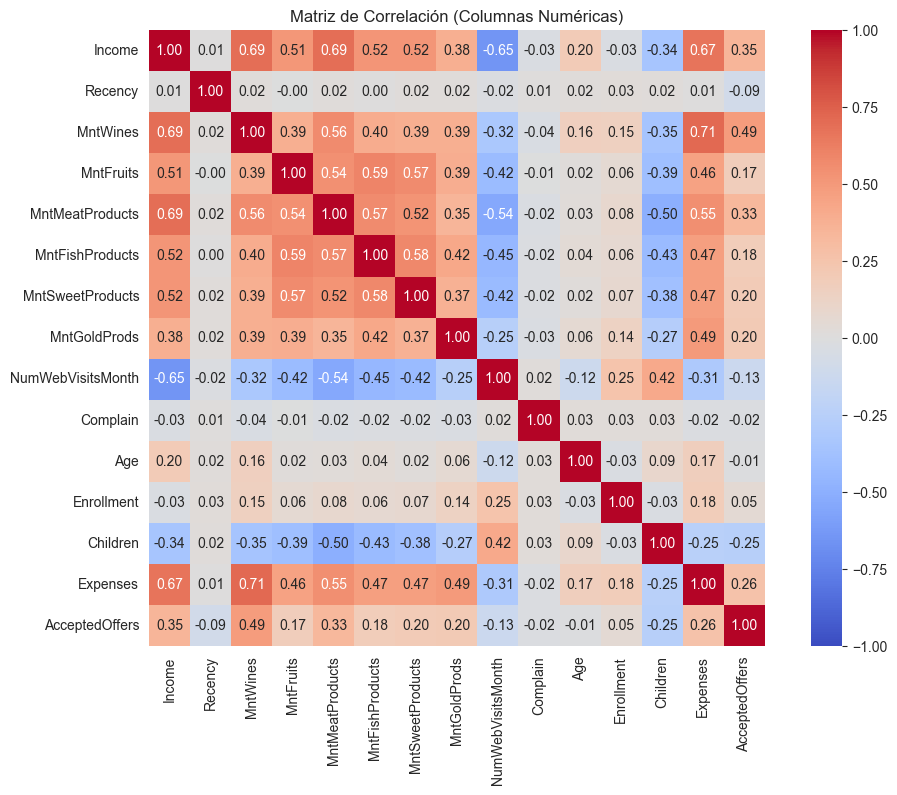

In [126]:
# Para ver la correlación entre las columnas numéricas
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])


correlation_matrix = numeric_df.corr()


plt.figure(figsize=(12, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, vmin=-1, vmax=1)

plt.title('Matriz de Correlación (Columnas Numéricas)')
plt.show()

## **Creación de funciones**
En este apartado se implementaran las funciones solicitadas en el taller relacionadas con el algoritmo de K-means.

Recordando el método del agoritmo de K-means, se tienen los siguientes pasos:
1. Seleccionar el número de k clusters a encontrar.
2. Seleccionar al azar los centros de gravedad (No es necesario que sean puntos del dataset).
3. Asignar a cada punto el centroide mas cercano (Se puede emplear cualquier tipo de distancia).
4. Calcular y asignar el nuevo centroide a cada cluster.
5. Reasignar cada punto de los datos a su centroide mas cercano.


Hay que tomar una consideración importante a la hora de seleccionar las posiciones iniciales de los centroides, pues dependiendo de ellas, se va a obtener un resulado distinto al final.

### **1) Construccion función inicialización centroide**
En este apartado se realiza la construccion para inicializar los centroides, tomando como base la función proporcionada, la cual se puede ver a continuación:

```python
def init_centroids(X, k):
    """
    Retorna una matriz numpy de tamaño (k, len(X[1]))
    con puntos aleatorios.

    Parameters:
    X: Matriz de instancias x características
    k: número de centroides a generar

    Returns:
    np.array Matriz de centroides.
    """
    return ?
```

Para la construcción de esta función se utilizara el método de KMeans ++, que a diferencia de el aleatorio, se toman puntos del dataset y se intenta maximizar la distancia entre ellos.


In [127]:
def init_centroids(X, k):
    # Convertir el DataFrame a un array de NumPy si es necesario
    if isinstance(X, pd.DataFrame):
        X = X.values
    
    # Seleccionar el primer centroide aleatorio
    centroids = np.zeros((k, X.shape[1]))
    centroids[0] = X[np.random.choice(X.shape[0])]
    
    for i in range(1, k):
        # Calcular la distancia al centroide más cercano
        distances = np.min(np.linalg.norm(X[:, np.newaxis] - centroids[:i], axis=2), axis=1)
        # Calcular la probabilidad de selección
        probabilities = distances**2
        probabilities /= probabilities.sum()  # Normalizar

        # Seleccionar el siguiente centroide basado en las probabilidades
        centroids[i] = X[np.random.choice(X.shape[0], p=probabilities)]

    return centroids

La función `init_centroids` implementa el enfoque KMeans++ para la inicialización de centroides en el algoritmo K-means. Este método comienza seleccionando un centroide aleatorio de los puntos de datos. Luego, calcula la distancia (en este caso euclidiana) de cada punto al centroide más cercano y utiliza estas distancias para establecer probabilidades de selección, proporcionales al cuadrado de las distancias. 

### **2) Construcción función puntos cercanos**
En este apartado se realiza la construccion para encontrar los puntos mas cercanos. A continuación la base que fue proporcionada:

```python
def closest_point(X,centroids):
 """
 Retorna una tupla donde la primera coordenada contiene un
arreglo numpy con el identificador del punto más cercano de cada
instancia a alguno de los centroides y la segunda tupla contiene un
arreglo numpy con la distancia al identificador del punto más
cercano

 Parameters:
 X: Matriz de instancias x características
 centroids: puntos centroides identificados
 Returns:
 tuple: Posición 0, identificadores de punto más cercano
 Posición 1, distancias a los puntos
 """
 ?

```
A continuación se encuentra la implementación propuesta

In [128]:
def closest_point(X, centroids):
    # Calcular la distancia entre cada punto y todos los centroides
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    
    # Encontrar el índice del centroide más cercano para cada punto
    closest_indices = np.argmin(distances, axis=1)
    
    # Obtener las distancias a los centroides más cercanos
    closest_distances = np.min(distances, axis=1)

    return closest_indices, closest_distances


La función `closest_point` se encarga de determinar el punto más cercano entre un conjunto de instancias \(X\) y un grupo de centroides proporcionados. Utiliza la distancia euclidiana para calcular la distancia entre cada punto y todos los centroides. Luego, identifica el índice del centroide más cercano para cada punto y obtiene la distancia correspondiente a ese centroide. Finalmente, la función retorna una tupla que contiene dos arreglos: el primero con los índices de los centroides más cercanos y el segundo con las distancias a dichos centroides. Esto es fundamental para el algoritmo K-means, ya que permite asignar cada punto al centroide más cercano en cada iteración.


### **3) Construcción función nuevos centroides**
En este apartado se realiza la construccion para encontrar los nuevos centroides. A continuación la base que fue proporcionada:

```python
def new_centers(X,labels):
 """
 Retorna matriz numpy con los nuevos centroides, dada la
asignación de cada punto a un cluster


 Parameters:
 X: Matriz de instancias x características
 labels: instancias asignadas
 Returns:
 np.array: Matriz con los nuevos centroides
 """
?
```
A continuación se encuentra la implementación propuesta

In [129]:
def new_centers(X, labels):
    k = np.unique(labels).shape[0]  # Número de clusters
    new_centroids = np.zeros((k, X.shape[1]))  # Inicializar nuevos centroides

    for i in range(k):
        # Calcular el nuevo centroide como la media de los puntos asignados al clúster i
        new_centroids[i] = X[labels == i].mean(axis=0)

    return new_centroids

## **K-MEANS**
A partir de las funciones creadas anteriormente y la estandarización de los datos, ahora es posible aplicar el algoritmo de K-Means. En este apartado se seguiran los pasos mencionados anteriormente para realizar el K-MEANS.

1. Seleccionar número de clusters
2. Seleccionar al azar los centros de gravedad (No es necesario que sean puntos del dataset).
3. Asignar a cada punto el centroide mas cercano (Se puede emplear cualquier tipo de distancia).
4. Calcular y asignar el nuevo centroide a cada cluster.
5. Reasignar cada punto de los datos a su centroide mas cercano.

In [130]:
# Para no tener problemas con las variables categoricas, el df se dejara unicamente con las variables numéricas
df = df.select_dtypes(include=['float64', 'int64'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             2239 non-null   float64
 1   Recency            2239 non-null   float64
 2   MntWines           2239 non-null   float64
 3   MntFruits          2239 non-null   float64
 4   MntMeatProducts    2239 non-null   float64
 5   MntFishProducts    2239 non-null   float64
 6   MntSweetProducts   2239 non-null   float64
 7   MntGoldProds       2239 non-null   float64
 8   NumWebVisitsMonth  2239 non-null   float64
 9   Complain           2239 non-null   int64  
 10  Age                2239 non-null   float64
 11  Enrollment         2239 non-null   float64
 12  Children           2239 non-null   float64
 13  Expenses           2239 non-null   float64
 14  AcceptedOffers     2239 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 279.9 KB


### **1. Seleccionar el número de k clusters a encontrar.**
En primer lugar se selecciona el número de clusters. Esto se hace con el método del codo.

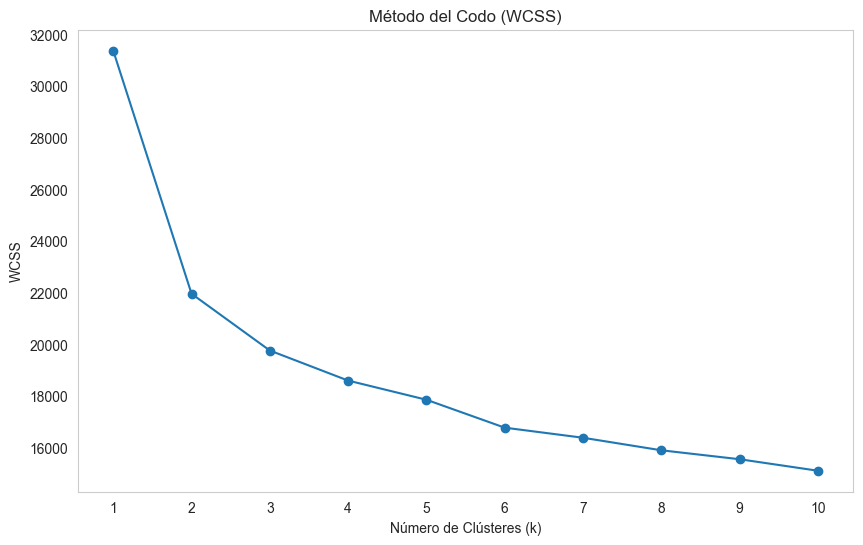

In [131]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Definir el rango de k a probar
k_values = range(1, 11)  # Ajusta el rango según sea necesario
wcss = []

# Calcular el WCSS para cada valor de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # inertia es el WCSS

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o')
plt.title('Método del Codo (WCSS)')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid()
plt.show()


A partir de la grafica, se puede ver que el codo se encuentra alrededor de 4, ya que no se observa una disminución significativa en el WCSS después de este punto. Por lo tanto, se seleccionará k = 4 para el algoritmo K-means.

### **2. Seleccionar al azar los centros de gravedad**
Ahora, se utilizara la funcion de inicializar los centroides definida anteriormente para 

In [132]:
# Inicializar los centroides
k = 4  # Número de clústeres
initial_centroids = init_centroids(df, k)

# Mostrar los centroides inicializados
print("Centroides inicializados:")
print(initial_centroids)

Centroides inicializados:
[[-0.04585625 -0.00417983 -0.81139753 -0.6614538  -0.70899954 -0.6505879
  -0.65592712 -0.72917858 -0.13031086  0.          1.06837508  0.02602244
   0.06594249 -1.28489181 -0.50205274]
 [ 0.01628622 -0.86752316  1.92824993 -0.6614538  -0.42542901 -0.68720089
  -0.65592712  2.49149215  1.10598582  0.          0.4842053   0.02602244
   0.06594249  2.10196315  0.62092037]
 [-0.7384073   0.16848883 -0.85002596 -0.48545317 -0.58936822 -0.50413592
  -0.60747377 -0.78669056  1.10598582  0.          0.06694117  0.02602244
   1.39607979 -0.7638372  -0.50205274]
 [-0.81381614  1.48077069 -0.22602817  2.40598585 -0.19945875  3.12055056
   2.46931348 -0.26908276  1.51808471  0.         -1.01794557  0.02602244
  -1.2641948   1.58090854 -0.50205274]]


### **3. Asignar a cada punto el centroide mas cercano**
Ahora, a cada uno de los puntos se le asigna uno de los centroides definidos 


In [133]:
labels, distances = closest_point(df.values, initial_centroids)

# Asignar las etiquetas de clúster al DataFrame original
df['Cluster'] = labels

# Resultados de primeros 5 puntos
print("Asignaciones de clústeres:")
print(df[['Cluster']].head())
print("\nDistancias a los centroides más cercanos:")
print(distances[:5]) 

Asignaciones de clústeres:
   Cluster
0        3
1        0
2        0
3        2
4        2

Distancias a los centroides más cercanos:
[4.37222591 2.03241085 4.0371671  2.74032052 3.64636118]


### **4. Calcular y asignar el nuevo centroide a cada cluster.**
Se calcula un nuevo centroide para los clusters con la función que ya se habia definido

In [134]:
# Calcular los nuevos centroides
new_centroids = new_centers(df.values, labels)

# Mostrar los nuevos centroides
print("\nNuevos centroides:")
print(new_centroids)


Nuevos centroides:
[[ 0.10882282 -0.02937612 -0.19681985 -0.1759683  -0.089063   -0.15403398
  -0.1689329  -0.28457836 -0.4581034   0.01001431  0.4487468  -0.29280548
  -0.324155   -0.17979387 -0.25464522  0.        ]
 [ 0.80396938 -0.22196242  1.32273611  0.26409016  0.62546086  0.23355311
   0.26064861  1.09541709 -0.21717484  0.00490196  0.17575711  0.297351
  -0.40025759  1.06113103  0.88514934  1.        ]
 [-0.72750051  0.06122379 -0.62831659 -0.48176402 -0.5521966  -0.50913611
  -0.4817193  -0.46870861  0.69900328  0.01241535 -0.37057393  0.05068281
   0.67696493 -0.58108582 -0.25996711  2.        ]
 [ 0.97755606  0.23109877  0.62841155  1.79713812  1.20452516  1.88404341
   1.78269416  0.67994279 -0.85567192  0.00406504 -0.23192851  0.15628801
  -0.85325808  0.8438069   0.19181682  3.        ]]


### **5. Reasignar cada punto de los datos a su centroide mas cercano.**
Aqui nuevamente se repite el proceso de iteración para asignar los puntos al centroide

In [135]:
labels, distances = closest_point(df.values, new_centroids)

# Asignar las etiquetas de clúster al DataFrame original
df['Cluster'] = labels

# Resultados de primeros 5 puntos
print("Asignaciones de clústeres:")
print(df[['Cluster']].head())
print("\nDistancias a los centroides más cercanos:")
print(distances[:5]) 

Asignaciones de clústeres:
   Cluster
0        3
1        0
2        0
3        2
4        2

Distancias a los centroides más cercanos:
[2.75077527 2.82270105 2.5413079  2.19285903 3.14837228]


### **6. Repetición del proceso**
Se repite el proceso, y el criterio de salida va a estar directamente relacionado con que los centroides no cambien significativamente en una iteración. Para este proces se muestra a continuación

In [136]:
# Definición tolerancia (criterio de salida)
tolerance = 1e-4
centroids_changed = True

# Inicializar los centroides
initial_centroids = init_centroids(df.values, k)

# Iniciar bucle hasta que los centroides ya no cambien significativamente
while centroids_changed:
    # Asignar etiquetas y calcular distancias
    labels, distances = closest_point(df.values, initial_centroids)

    # Calcular nuevos centroides
    new_centroids = new_centers(df.values, labels)

    # Comprobar si los centroides han cambiado significativamente
    centroids_changed = np.linalg.norm(new_centroids - initial_centroids) > tolerance

    # Actualizar los centroides para la próxima iteración
    initial_centroids = new_centroids

print("\nCentroides finales:")
print(initial_centroids)



Centroides finales:
[[-0.78216004  0.04013582 -0.67173747 -0.51659351 -0.58674634 -0.53136473
  -0.51031704 -0.45650234  0.73642007  0.01261468 -0.38515878  0.05943083
   0.64711486 -0.6498565  -0.25221698  1.99770642]
 [-0.26149139 -0.09752422 -0.49528436 -0.44591212 -0.54506033 -0.45473185
  -0.44684266 -0.41454219 -0.17521907  0.00854701  0.45781424 -0.38170273
  -0.11027228 -0.52641221 -0.35808183  0.        ]
 [ 1.03378407  0.10836536  0.66627371  1.75136478  1.29081658  1.87551119
   1.75837397  0.84509112 -0.93820258  0.00719424 -0.19842681  0.07317875
  -0.86706748  0.81947532  0.34219683  2.89928058]
 [ 0.83257577 -0.03137306  1.01823521  0.27741869  0.65681808  0.24923098
   0.26616886  0.57510539 -0.48202167  0.00644122  0.28464419  0.17144848
  -0.43741059  0.9423859   0.47082896  0.78582931]]


### **7. Resultados obtenidos**
Al tener los ultimos centroides, se calculan los resultados obtenidos, y es posible visualizarlos al reducir la dimensionalidad del df, de manera que a continuación se pueden evidenciar dichos resultados.

Contribución de las variables a cada componente:
                   Componente Principal 1  Componente Principal 2
Income                           0.360834                0.209251
Recency                          0.004208               -0.061878
MntWines                         0.321485                0.131168
MntFruits                        0.311683               -0.193683
MntMeatProducts                  0.352517               -0.011257
MntFishProducts                  0.321895               -0.185098
MntSweetProducts                 0.310564               -0.189643
MntGoldProds                     0.250049               -0.078363
NumWebVisitsMonth               -0.273512               -0.285591
Complain                        -0.001336               -0.000371
Age                              0.048729                0.447819
Enrollment                       0.039855               -0.301925
Children                        -0.246614               -0.051433
Expenses                   

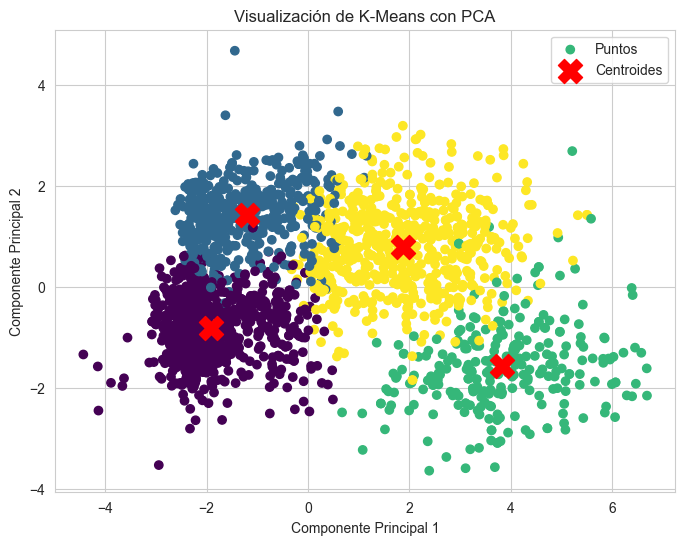

In [137]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Aplicar PCA para reducir las dimensiones a 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.values)

# Mostrar la contribución de cada variable a los componentes principales
pca_components = pd.DataFrame(pca.components_, columns=df.columns, index=['Componente Principal 1', 'Componente Principal 2'])

print("Contribución de las variables a cada componente:")
print(pca_components.T)

# Graficar los puntos y sus centroides
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', label='Puntos')
plt.scatter(pca.transform(initial_centroids)[:, 0], pca.transform(initial_centroids)[:, 1], 
            s=300, c='red', label='Centroides', marker='X')

plt.title('Visualización de K-Means con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


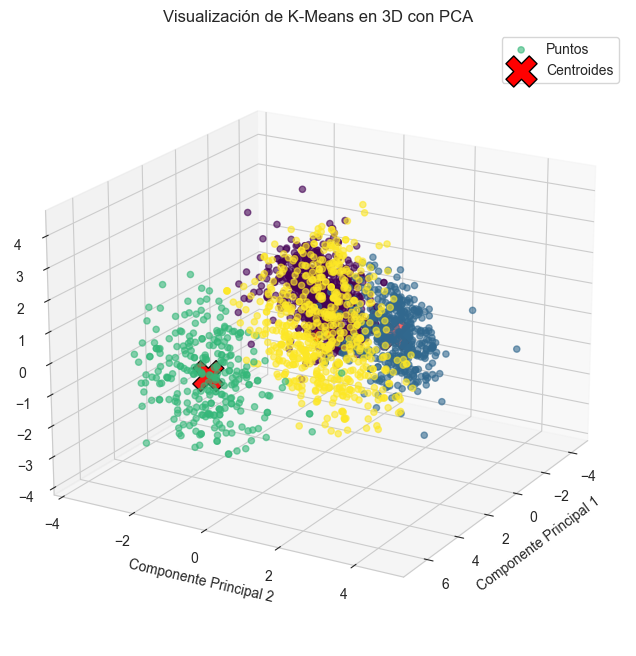

In [138]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Reducir a 3 componentes principales usando PCA
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(df.values)

# Transformar los centroides a las nuevas componentes principales
centroids_pca_3d = pca.transform(initial_centroids)

# Crear gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos y los centroides
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], 
                     c=labels, cmap='viridis', marker='o', alpha=0.6, label='Puntos')
centroides_scatter = ax.scatter(centroids_pca_3d[:, 0], centroids_pca_3d[:, 1], centroids_pca_3d[:, 2], 
                                 s=500, c='red', marker='X', label='Centroides', edgecolors='k')

# Agregar leyenda
ax.legend(loc='best')

# Configurar títulos de los ejes
ax.set_title('Visualización de K-Means en 3D con PCA')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Opcional: ajustar la vista del gráfico
ax.view_init(elev=20, azim=30)  # Ajustar ángulo de elevación y azimut

plt.show()


## **Conclusiones**
A lo largo del proceso de construcción del modelo de K-Means, comenzamos con una limpieza exhaustiva de los datos, eliminando variables categóricas y asegurando que el DataFrame contuviera solo características numéricas. Implementamos funciones clave como `init_centroids`, `closest_point` y `new_centers` para inicializar los centroides, asignar puntos a clústeres y recalcular los centroides iterativamente. Utilizamos el método del codo para determinar el número óptimo de clústeres, lo que mejoró la interpretación de los resultados. Finalmente, visualizamos los clústeres y sus centroides a través de técnicas de reducción de dimensiones como PCA, facilitando la identificación de patrones. Este enfoque metódico nos permitió construir un modelo de K-Means efectivo. 
